In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df = pd.read_csv("covid_19_india.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


In [ ]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,9291.000000,9.291000e+03,9291.000000,9.291000e+03
mean,4646.000000,7.863266e+04,1487.620385,9.183978e+04
std,2682.225009,1.931102e+05,4713.813690,2.166014e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2323.500000,1.520000e+02,2.000000,5.385000e+02
50%,4646.000000,4.308000e+03,66.000000,6.832000e+03
75%,6968.500000,5.772650e+04,926.500000,7.885600e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


<AxesSubplot:>

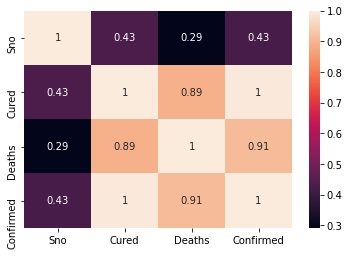

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995


In [ ]:
df["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [ ]:
df=df.replace("Maharashtra***","Maharashtra")
df=df.replace("Telangana***","Telangana")
df=df.replace("Telengana***","Telangana")
df=df.replace("Telengana","Telangana")
df=df.replace("Chandigarh***","Chandigarh")
df=df.replace("Punjab***","Punjab")

In [ ]:
df["State/UnionTerritory"].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu'], dtype=object)

In [ ]:
# per day average confirmed cases for all states/UT

In [ ]:
df.groupby(["Date","State/UnionTerritory"])["Confirmed"].mean()

Date      State/UnionTerritory       
01/02/20  Kerala                              2
01/03/20  Kerala                              3
01/04/20  Andaman and Nicobar Islands        10
          Andhra Pradesh                     83
          Assam                               1
                                          ...  
31/10/20  Telangana                      238632
          Tripura                         30717
          Uttar Pradesh                  480082
          Uttarakhand                     61915
          West Bengal                    369671
Name: Confirmed, Length: 9291, dtype: int64

In [ ]:
#linegraph that shows distribution of per day confirmed cases in Maharashtra in 2020.

In [ ]:
mh = df[df["State/UnionTerritory"]=="Maharashtra"]

In [ ]:
x=mh["Date"]
y=mh["Confirmed"]

<Figure size 432x288 with 0 Axes>

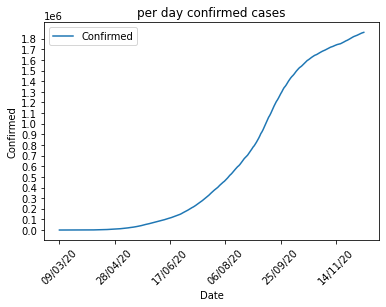

In [ ]:
plt.figure()
mh.plot(x="Date",y="Confirmed")
plt.title("per day confirmed cases")
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.xticks(rotation=45)
plt.yticks(np.arange(y.min(),y.max(),100000))
plt.show()

In [ ]:
# pie-chart displaying percentage of total cured and total death cases in Maharashtra.

In [ ]:
mh["Cured"].sum()

147793712

In [ ]:
mh["Deaths"].sum()

5113730

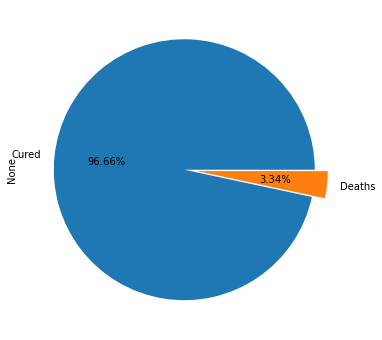

In [ ]:
plt.figure(figsize=(6,6))

mh[["Cured","Deaths"]].sum().plot(kind = "pie",autopct = "%1.2f%%",explode=(0,0.1))
plt.show()

In [ ]:
# barplot showing top-5 states with maximum number of total confirmed cases.

In [ ]:
total = df.groupby(["State/UnionTerritory"])["Confirmed"].sum()

In [ ]:
maximum = total.sort_values(ascending=False).head(5)

In [ ]:
maximum

State/UnionTerritory
Maharashtra       181173762
Andhra Pradesh     84815303
Tamil Nadu         82789540
Karnataka          79354749
Uttar Pradesh      50283822
Name: Confirmed, dtype: int64

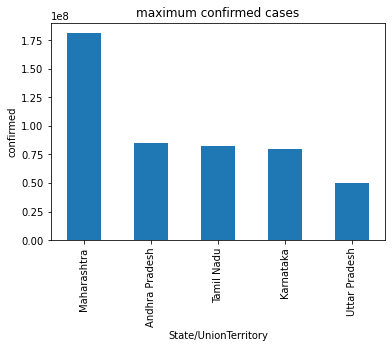

In [ ]:
plt.figure()
maximum.plot(kind="bar")
plt.title("maximum confirmed cases")
plt.ylabel("confirmed")
plt.show()

In [ ]:
# 3 states have lowest total death cases


In [ ]:
states = df.groupby("State/UnionTerritory")["Deaths"].sum()

In [ ]:
states.drop(["Unassigned","Cases being reassigned to states"],inplace=True)

In [ ]:
states.sort_values()

State/UnionTerritory
Dadar Nagar Haveli                                0
Daman & Diu                                       0
Mizoram                                         159
Dadra and Nagar Haveli and Daman and Diu        296
Arunachal Pradesh                              3268
Nagaland                                       3528
Sikkim                                         5998
Andaman and Nicobar Islands                    6420
Meghalaya                                      7403
Ladakh                                         7750
Manipur                                       14435
Chandigarh                                    20701
Himachal Pradesh                              32216
Tripura                                       32265
Goa                                           55207
Puducherry                                    57565
Assam                                         85655
Jharkhand                                     87762
Uttarakhand                                

In [ ]:
states.sort_values().head(3)

State/UnionTerritory
Dadar Nagar Haveli      0
Daman & Diu             0
Mizoram               159
Name: Deaths, dtype: int64

In [ ]:
# multi linegraph that shows distribution of per day confirmed cases,
# death cases and cured cases in India in 2020.

In [ ]:
df2=df[["Date","Confirmed","Deaths","Cured"]]

In [ ]:
df2

,Date,Confirmed,Deaths,Cured
0,30/01/20,1,0,0
1,31/01/20,1,0,0
2,01/02/20,2,0,0
3,02/02/20,3,0,0
4,03/02/20,3,0,0
...,...,...,...,...
9286,09/12/20,275261,1480,266120
9287,09/12/20,32945,373,32169
9288,09/12/20,79141,1307,72435
9289,09/12/20,558173,7967,528832


In [ ]:
x=df2["Date"]
y=df2["Confirmed"]
z=df2["Deaths"]
v=df2["Cured"]


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


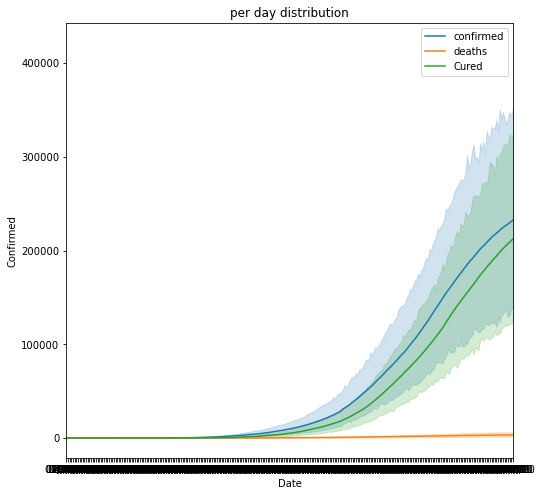

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x,y,label="confirmed")
sns.lineplot(x,z,label="deaths")
sns.lineplot(x,v,label="Cured")
plt.xlim((df["Date"].min(),df["Date"].max()))
plt.title("per day distribution")
plt.show()